In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('/content/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Churn_Modelling.csv'

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X, y = df.drop('Exited', axis = 1), df['Exited'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1, inplace = True)

KeyError: "['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'] not found in axis"

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
0,619,42,2,0.00,1,1,1,101348.88,2
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,2
3,699,39,1,0.00,2,0,0,93826.63,1
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,2
9998,772,42,3,75075.31,2,1,0,92888.52,2


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

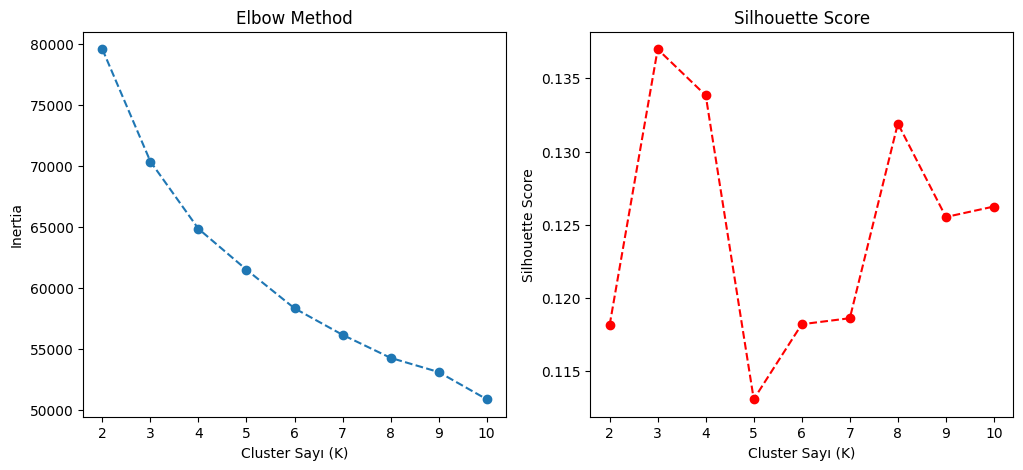

In [ ]:
wcss = []
silhouette_scores = []

K_range = range(2, 11)  # 2-dən 10-a qədər klaster yoxlayaq

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    wcss.append(kmeans.inertia_)  # WCSS (Elbow Method)
    silhouette_scores.append(silhouette_score(df_scaled, labels))  # Silhouette Score

# Elbow Method Qrafiki
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Cluster Sayı (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Silhouette Score Qrafiki
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Cluster Sayı (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

plt.show()


In [ ]:
optimal_k = 2  # Optimal K dəyərini Elbow və Silhouette Score-a əsasən seç

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df["Cluster"] = clusters  # Datasetə cluster sütunu əlavə et


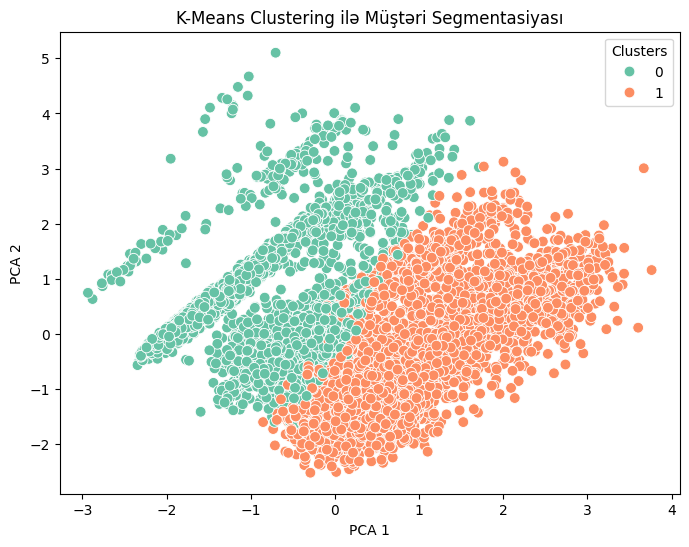

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="Set2", s=60)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering ilə Müştəri Segmentasiyası")
plt.legend(title="Clusters")
plt.show()

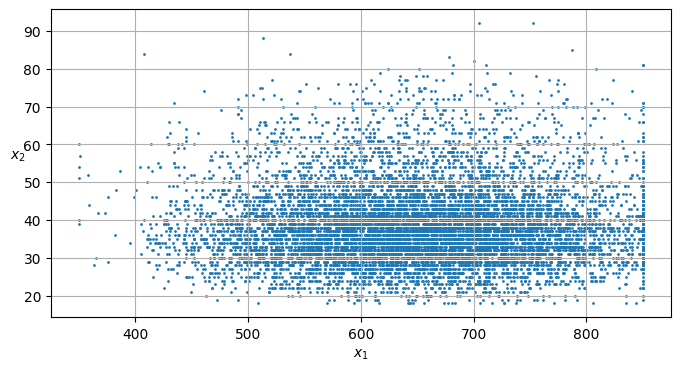

In [ ]:
def plot_clusters(X, y = None):
  X_np = X.values
  plt.scatter(X_np[:,0], X_np[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

plt.figure(figsize = (8,4))
plot_clusters(X)
plt.grid()
plt.show()